## **🧠 Brain Stroke with Random Forest Classification - Accuracy 97%**

**Machine learning model - Random Forest Classification Model**

**Data source -** https://www.kaggle.com/code/reihanenamdari/brain-stroke-prediction-decisiontree/data?select=full_data.csv

**Training accuracy - 1.0**

**Validation accuracy - 0.9667370644139388**

Import libraries

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
sns.set(style="darkgrid")

Import data

In [66]:
dataset = pd.read_csv('full_data.csv')

In [67]:
#display the dataset
dataset

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0


In [68]:
#set X and y
target = 'stroke'
X = dataset.loc[:,dataset.columns!=target]
y = dataset.loc[:,dataset.columns==target]

In [69]:
columns = ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status']
x = pd.get_dummies(X[columns])

0    4733
1     248
Name: stroke, dtype: int64


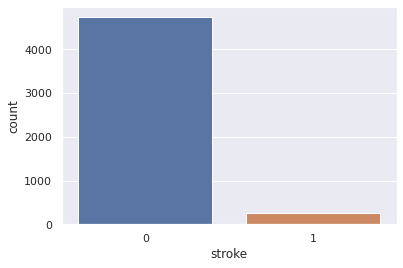

In [70]:
#plot dataset target value counts
ax = sns.countplot(x=target,data=dataset)
print(dataset[target].value_counts())

In [71]:
#percentage of no stroke
percentage_of_no_stroke = 100*(4733/float(dataset.shape[0]))
percentage_of_no_stroke

95.0210801043967

In [72]:
#percentage of strokes
percentage_of_strokes = 100*(248/float(dataset.shape[0]))
percentage_of_strokes

4.978919895603292

In [73]:
import seaborn as sns
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
x, y = oversample.fit_resample(x, y)

1    4733
0    4733
Name: stroke, dtype: int64


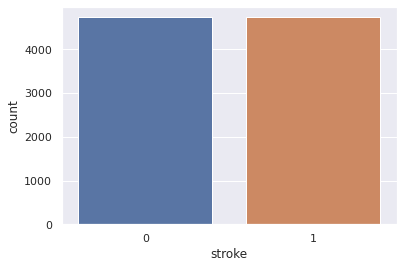

In [74]:
#plot y target value counts
ax = sns.countplot(x=target,data=y)
print(y[target].value_counts())

Split dataset

In [75]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20, shuffle=True)

Random forest classification model build

In [76]:
from sklearn.ensemble import RandomForestClassifier

def rf(x_train, y_train, n_estimators=250):
 rndforest = RandomForestClassifier(n_estimators=n_estimators, n_jobs=-1)
 rndforest.fit(x_train, y_train)
 return rndforest

In [77]:
random_forest_en = rf(x_train,y_train.values.ravel(), n_estimators=250)

In [78]:
#print training accuracy and validation accuracy
print("TRAINING ACCURACY:", random_forest_en.score(x_train, y_train))
print("VALIDATION ACCURACY", random_forest_en.score(x_test, y_test))

TRAINING ACCURACY: 1.0
VALIDATION ACCURACY 0.9667370644139388


In [79]:
#create confusion matrix and save as a png file 
import itertools
def plot_confusion_matrix(model, x, y, class_names, file_name,
                          normalize=False,
                          title='CONFUSION MATRIX',
                          cmap=plt.cm.Greys):
    y_pred = model.predict(x)
    # Compute confusion matrix
    cnf_matrix  = confusion_matrix(y, y_pred)
    np.set_printoptions(precision=1)
    plt.figure(figsize=(18, 16))

    if normalize:
        cnf_matrix = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]
        print("CONFUSION MATRIX")
    else:
        print('CONFUSION MATRIX')

    plt.imshow(cnf_matrix, interpolation='nearest', cmap=cmap)
    plt.title('CONFUSION MATRIX')
    plt.colorbar()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=90)
    plt.yticks(tick_marks, class_names)

    fmt = '.2f' if normalize else 'd'
    thresh = cnf_matrix.max() / 2.
    for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
        plt.text(j, i, format(cnf_matrix[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cnf_matrix[i, j] > thresh else "black")

    plt.ylabel('CLASS')
    plt.xlabel('PREDICTED CLASS')
    plt.tight_layout()
    plt.savefig(file_name+'.png')
    plt.show()

Trian confusion matrix

CONFUSION MATRIX


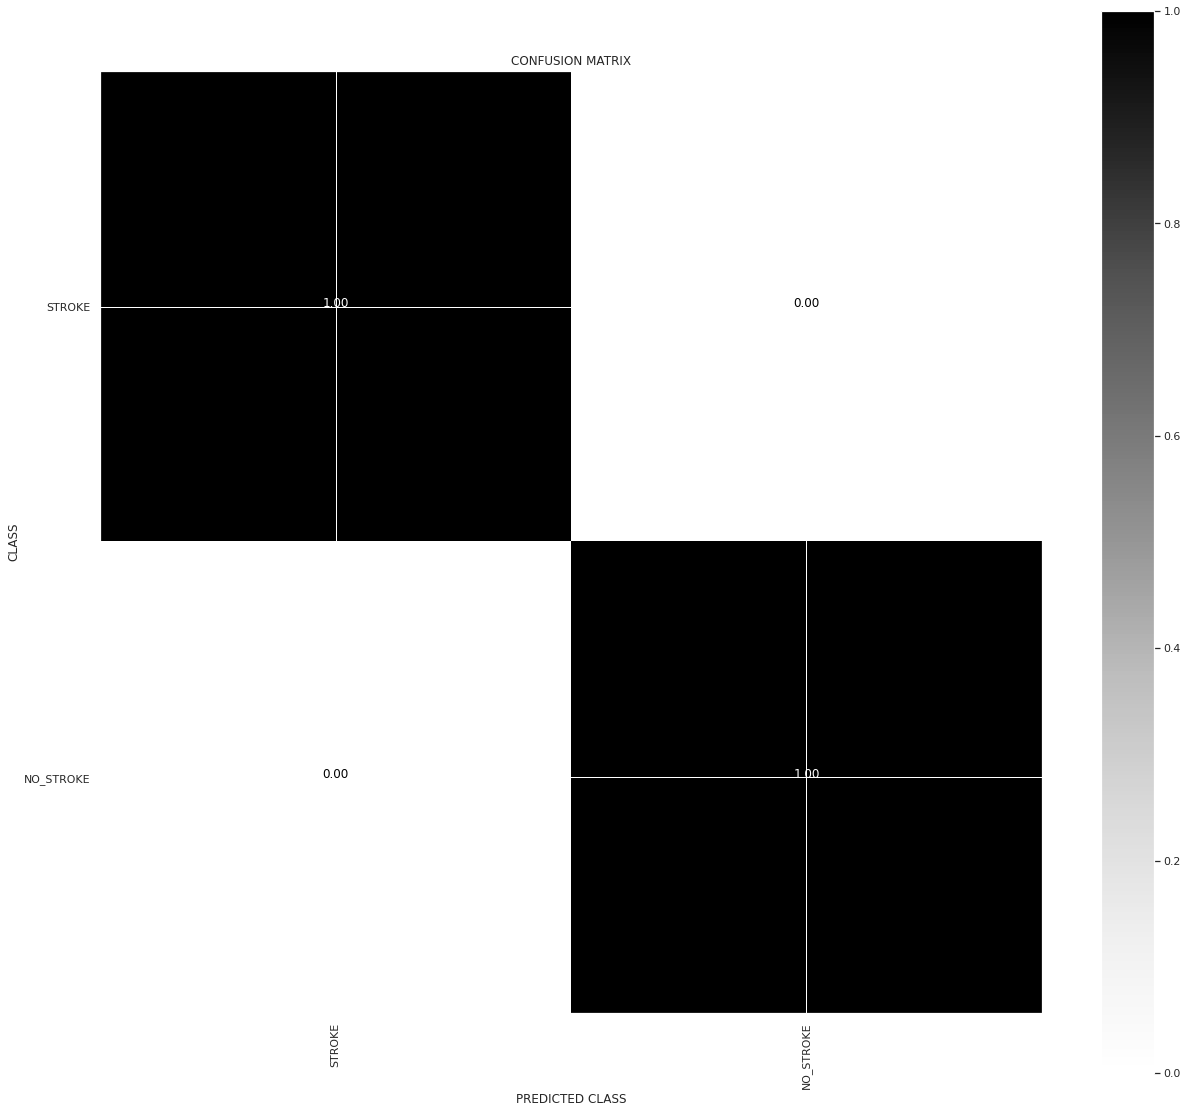

In [80]:
from sklearn.metrics import confusion_matrix

LABELS = ['STROKE', 'NO_STROKE']
plot_confusion_matrix(random_forest_en, x_train, y_train, class_names=LABELS, file_name='ConfussionMatrix', normalize=True)

Test confusion matrix

CONFUSION MATRIX


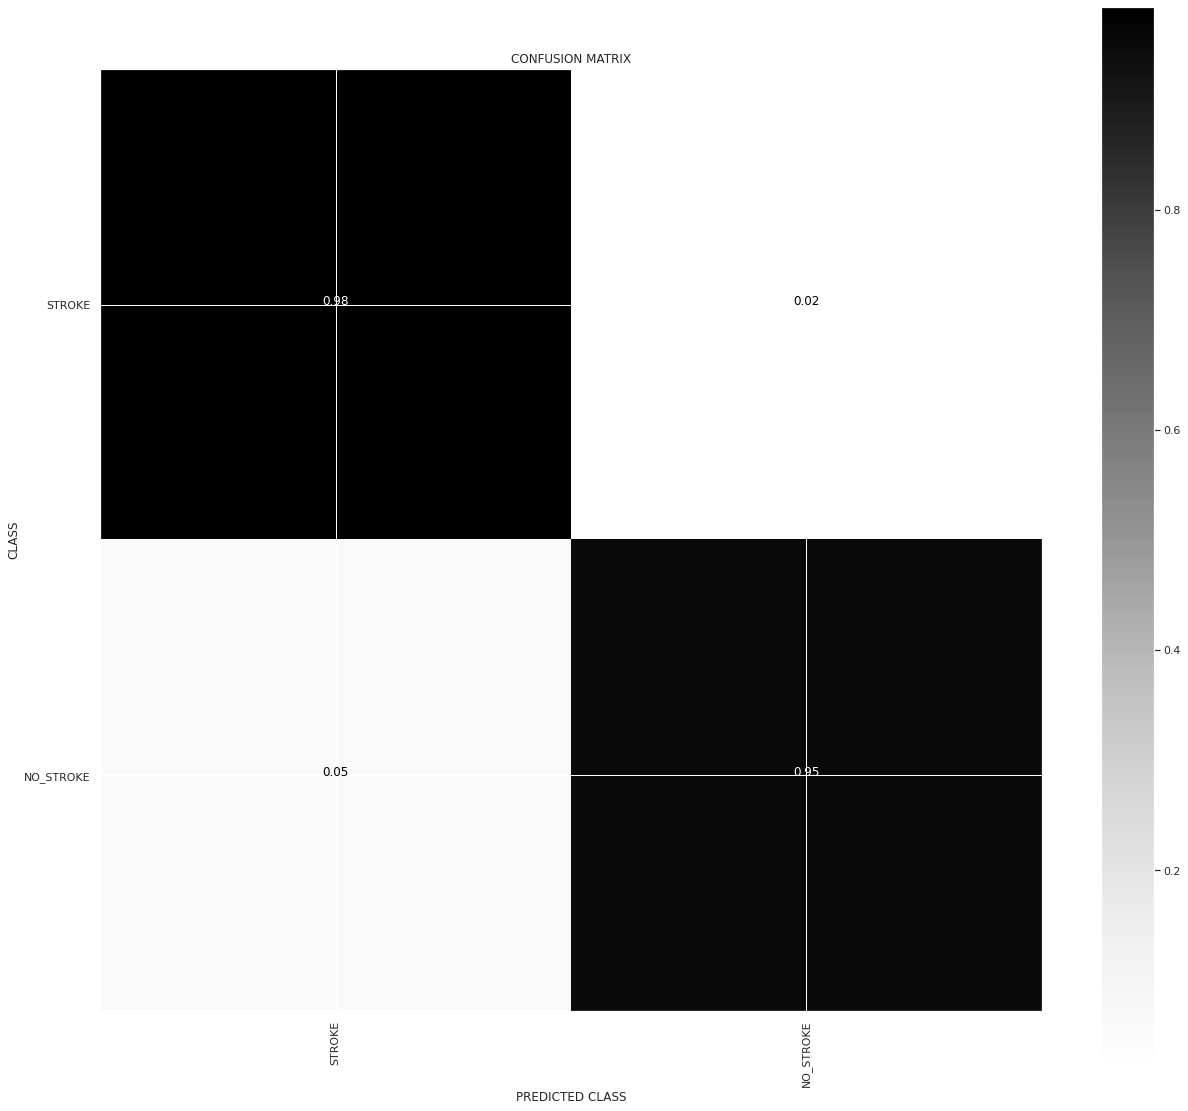

In [81]:
plot_confusion_matrix(random_forest_en, x_test, y_test, class_names=LABELS, file_name='ConfussionMatrix', normalize=True)